# 1 - Abstract:

This report aims to analyse information from Twitter by designing and implementing a regression analysis model to predict the number of likes (favourites) a tweet will receive based on tweet characteristics. The report covers the steps taken to extract tweets from different Twitter accounts, perform exploratory data analysis, clean and manipulate the data for regression analysis, and design and evaluate the performance of the regression model. The report also discusses the selection of appropriate predictive features, considerations in selecting users and tweets for analysis, and visualisations used to present the data. The results show that the developed model can predict the number of likes for a tweet with reasonable accuracy.


# 2 - Introduction:
Twitter is a widely-used social media platform where millions share short messages called tweets daily. Tweets are up to 280 characters and can be shared in real time with a user's friends and followers. A key metric often used to evaluate the popularity of a tweet is the number of likes, also known as "favourites," it receives.

This task aims to analyse Twitter data and develop a regression-based predictive model to estimate the number of likes a future tweet might receive based on tweet characteristics. The first step is to collect at least 300 tweets from at least 3 Twitter accounts to accomplish this objective. The second step is to conduct exploratory data analysis to gain insight into the data, transform the data into a format suitable for regression analysis, and store the cleaned data. The next step will involve designing and implementing a regression analysis model using the Scikit-learn package. Then will select appropriate features for our model, including the number of mentions, hashtags, words/characters, time of day, the sentiment of the words, and the number of emojis. The final step will involve evaluating our model's performance and testing it on a tweet that our model has not previously seen. 


# 3 - Methedology:
The methodology for this task involves the following steps:

- Data Collection:
I will extract at least 300 tweets from 7 Twitter accounts. I will use the tweepy package to access the Twitter API and collect the tweets.

- Exploratory Data Analysis:
I will perform a simple exploratory data analysis to understand better the data I have collected. This will involve visualisations such as histograms and scatter plots to show the data distribution and identify any outliers or missing values.

- Data Manipulation:
I will manipulate the data into a form suitable for regression analysis. This will involve some data cleaning, such as removing irrelevant data, converting categorical data into numerical data, and dealing with missing values. 

- Regression Analysis Model:
I will design and implement a regression analysis model based on one of the sklearn methods described in the module. I will select appropriate predictive features, such as the number of mentions in a tweet, the number of hashtags, the time of day, week, or year, and the sentiment of the words. I will evaluate the model's performance using metrics such as mean-squared error and R-squared.

- Testing the Model:
I will test the model on a tweet that the model has not seen before. This can be done with a train/test split of the collected data, collecting new data for testing, or developing an alternative protocol.

- Visualisations:
I will use appropriate visualisations to present the data throughout the report, such as histograms, scatter plots, and line graphs. I will also use visualisations to demonstrate the performance of the regression analysis model, such as a comparison of predicted vs actual values.

# 4 - Task:
To achieve our objectives, we will follow a systematic approach that includes data collection using the tweepy package, exploratory data analysis to understand better the collected data, data manipulation to prepare the data for regression analysis, and design and evaluation of a regression analysis model based on appropriate predictive features. In addition, we will test the model's performance on a tweet it has not seen before and use visualisations to present the data throughout the report.

## 4.0 - Setting Up:

This block of code imports necessary Python packages and libraries.

- The first package imported is "transformers," used for natural language processing (NLP) tasks like sentiment analysis. The "AutoTokenizer" and "AutoModelForSequenceClassification" functions are imported from this package to allow sentiment analysis of tweets.

- The next package imported is "torch," a machine learning framework for building and training neural networks.

- The "scipy.special" package is imported to allow for the use of the softmax function, which is used to convert raw predictions into probabilities.

- The "snscrape.modules.twitter" package is imported to allow for the scraping of tweets from Twitter.

- The "pandas" and "numpy" packages are imported for data manipulation and analysis.

- The "matplotlib.pyplot" and "seaborn" packages are imported for data visualisation.

- The "calendar" package is imported to allow for the conversion of dates into a more readable format.

- The "re" package is imported to allow for regular expressions, which can be used to match patterns in text.

- The "TextBlob" package is imported to allow sentiment analysis of tweets.

- The "string" package is imported to allow for the manipulation of strings.

- The "sklearn.feature_selection," "sklearn.linear_model," "sklearn.model_selection," and "sklearn.metrics" packages are imported to allow for the implementation of machine learning models, including linear regression and Lasso, as well as feature selection and evaluation of model performance using metrics such as mean squared error.

Overall, this block of code imports the necessary packages and libraries for analysing Twitter data, including data cleaning, feature selection, and the implementation and evaluation of regression analysis models for predicting the number of likes a tweet will receive.


In [ ]:
!pip install snscrape
!pip install transformers
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from scipy.special import softmax
from scipy.stats import gaussian_kde
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob
import string
import os
from datetime import datetime
import joblib
from sklearn.feature_selection import mutual_info_regression, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error
from sklearn.neural_network import MLPRegressor


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 4.1 - Tweets Extraction:
The snscrape module provides a simple and efficient way to scrape Twitter data, with various search options and filter criteria. Unlike Twitter APIs, snscrape does not require authentication or access tokens, making it an accessible and flexible option for scraping Twitter data. The resulting data can be stored in various formats, such as CSV and JSON.

We used Python to explore the snscrape module and its functions for scraping Twitter data. Specifically, we imported the snscrape.modules.twitter module as sntwitter to access Twitter-related functions. We explored the TwitterSearchScraper class, which allows users to scrape Twitter data based on specific search queries, such as keywords, hashtags, usernames, and date ranges. We also explored the TwitterUserScraper class, allowing users to scrape tweets from a specific Twitter user's account. 

Our code successfully retrieved tweets from multiple Twitter accounts within the specified time range. The resulting DataFrame contained several columns, including the date and time when the tweet was posted, the account username, the tweet's text, and other relevant information such as view count, vibe,  inReplyToUser, mentionedUsers and Language. 

We demonstrated the use of these functions in a Jupyter notebook environment.


**Source:**

Youtube: https://www.youtube.com/watch?v=jtIMnmbnOFo&ab_channel=AISpectrum

GitHub: https://github.com/JustAnotherArchivist/snscrape

**Overview of the attributes of the Tweet class and discussion on the issues**

The Tweet class returns a wide variety of data according to user requirements. 
However, the view count was returning empty. 

After researching, I found that the view count is not a data field available through Twitter's API.

Twitter's API provides access to data primarily related to real-time communication and engagement rather than content consumption. While view counts and impressions can be helpful metrics for measuring the success of a video or other type of content, they are not directly related to Twitter's core functionality of sharing short messages and interacting with other users.

Twitter calculates and stores view counts and other engagement metrics internally but does not make this data directly available through its API. Therefore, sntwitter, like other Twitter API wrappers, cannot return the view count.



	url: str
	date: datetime.datetime
	rawContent: str
	renderedContent: str
	id: int
	user: 'User'
	replyCount: int
	retweetCount: int
	likeCount: int
	quoteCount: int
	conversationId: int
	lang: str
	source: typing.Optional[str] = None
	sourceUrl: typing.Optional[str] = None
	sourceLabel: typing.Optional[str] = None
	links: typing.Optional[typing.List['TextLink']] = None
	media: typing.Optional[typing.List['Medium']] = None
	retweetedTweet: typing.Optional['Tweet'] = None
	quotedTweet: typing.Optional['Tweet'] = None
	inReplyToTweetId: typing.Optional[int] = None
	inReplyToUser: typing.Optional['User'] = None
	mentionedUsers: typing.Optional[typing.List['User']] = None
	coordinates: typing.Optional['Coordinates'] = None
	place: typing.Optional['Place'] = None
	hashtags: typing.Optional[typing.List[str]] = None
	cashtags: typing.Optional[typing.List[str]] = None
	card: typing.Optional['Card'] = None
	viewCount: typing.Optional[int] = None
	vibe: typing.Optional['Vibe'] = None

  **Source:**
	
  GitHub: https://github.com/JustAnotherArchivist/snscrape/blob/master/snscrape/modules/twitter.py

In [ ]:
# Tweeter account list
query = ["(from:Cristiano) until:2022-01-01 since:2018-01-01", "(from:LewisHamilton) until:2022-01-01 since:2018-01-01", "(from:KingJames) until:2022-01-01 since:2018-01-01", "(from:imVkohli) until:2022-01-01 since:2018-01-01", "(from:FloydMayweather) until:2022-01-01 since:2018-01-01", "(from:MikeTyson) until:2022-01-01 since:2018-01-01", "(from:TheRock) until:2022-01-01 since:2018-01-01"]
tweets = []
# Tweet scrap limit
limit = 1000

In [ ]:
# Ask the user to choose either all accounts or a single account
all_accounts = input("Do you want to scrape data for all accounts? (yes/no)").lower() == 'yes'
account = input("Which account do you want to scrape data for? (Cristiano, LewisHamilton, KingJames, imVkohli, FloydMayweather, MikeTyson, TheRock)")

Do you want to scrape data for all accounts? (yes/no)no
Which account do you want to scrape data for? (Cristiano, LewisHamilton, KingJames, imVkohli, FloydMayweather, MikeTyson, TheRock)LewisHamilton


In [ ]:
# Algorithm to scrape either one or multiple account tweets
if not all_accounts:    
    index = ['Cristiano', 'LewisHamilton', 'KingJames', 'imVkohli', 'FloydMayweather', 'MikeTyson', 'TheRock'].index(account)
    q = query[index]
    for tweet in sntwitter.TwitterSearchScraper(q).get_items():
        if len(tweets) == limit:
            break
        else:
            tweets.append([tweet.date, tweet.username, tweet.content, tweet.lang, tweet.viewCount, tweet.likeCount, tweet.retweetCount, tweet.replyCount, tweet.quoteCount, tweet.hashtags ,tweet.vibe, tweet.inReplyToUser, tweet.mentionedUsers])
    df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet', 'Tweet Language', 'View Count', 'Like Count',  'Reetweet Count', 'Reply Count', 'Quote Count', 'Hashtags', 'Vibe', 'inReplyToUser' , 'Mentioned Users'])
    df.to_csv(f"{account}.csv")
else:
    for q in query:
        for tweet in sntwitter.TwitterSearchScraper(q).get_items():
            if len(tweets) == limit:
                break
            else:
                tweets.append([tweet.date, tweet.username, tweet.content, tweet.lang, tweet.viewCount, tweet.likeCount, tweet.retweetCount, tweet.replyCount, tweet.quoteCount, tweet.hashtags ,tweet.vibe, tweet.inReplyToUser, tweet.mentionedUsers])
    df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet', 'Tweet Language', 'View Count', 'Like Count',  'Reetweet Count', 'Reply Count', 'Quote Count', 'Hashtags', 'Vibe', 'inReplyToUser' , 'Mentioned Users'])
    df.to_csv('all_accounts.csv')


<ipython-input-464-9053b6d83eea>:9: DeprecatedFeatureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date, tweet.username, tweet.content, tweet.lang, tweet.viewCount, tweet.likeCount, tweet.retweetCount, tweet.replyCount, tweet.quoteCount, tweet.hashtags ,tweet.vibe, tweet.inReplyToUser, tweet.mentionedUsers])
<ipython-input-464-9053b6d83eea>:9: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.username, tweet.content, tweet.lang, tweet.viewCount, tweet.likeCount, tweet.retweetCount, tweet.replyCount, tweet.quoteCount, tweet.hashtags ,tweet.vibe, tweet.inReplyToUser, tweet.mentionedUsers])


In [ ]:
# Loading the DataFrame from the saved csv file by the algorithm
df = pd.read_csv('all_accounts.csv')

In [ ]:
# Checking the first five rows data
df.head()

,Unnamed: 0,Date,User,Tweet,Tweet Language,View Count,Like Count,Reetweet Count,Reply Count,Quote Count,Hashtags,Vibe,inReplyToUser,Mentioned Users
0,0,2021-12-11 15:57:02+00:00,LewisHamilton,"P2 on the front row tomorrow, not bad since I ...",en,NaN,118331,8471,8042,2319,NaN,NaN,NaN,NaN
1,1,2021-12-11 12:29:50+00:00,LewisHamilton,quali today 🚀 https://t.co/EZ5mpBs00o,en,NaN,70372,3911,2006,676,NaN,NaN,NaN,NaN
2,2,2021-12-10 17:45:08+00:00,LewisHamilton,"We’ve come a long way, me and @ValtteriBottas....",en,NaN,124630,8820,2043,1353,NaN,NaN,NaN,"[User(username='ValtteriBottas', id=1143472657..."
3,3,2021-12-07 15:03:20+00:00,LewisHamilton,"When I was younger, I used to try to blend in....",en,NaN,25969,2624,937,470,NaN,NaN,NaN,"[User(username='MasterClass', id=3108033410, d..."
4,4,2021-12-01 18:55:12+00:00,LewisHamilton,Equality for all. https://t.co/LklC5SZ4lB,en,NaN,103636,7975,3050,1352,NaN,NaN,NaN,NaN


# 4.2 - Exploratory Data Analysis:

Exploratory data analysis (EDA) examines and summarises a dataset to understand its main characteristics, identify patterns and relationships between variables, and detect anomalies or outliers. As part of EDA, various techniques are used, including data visualisation, statistical analysis, and transformation. As a result of EDA, we can gain insights into the data, identify potential issues, and generate hypotheses for further investigation. We can better understand the underlying structure and relationships by exploring the data, enabling us to conduct further analysis and modelling.


**Overview of performed EDA techniques:**
- Columns Correlation: A correlation matrix is generated, and a heatmap is plotted to visualise the correlation between different columns.
- Tweets Analysis: The number of tweets is plotted over time, and the trend of tweet counts over time is analysed.
- Like Analysis: The like count is plotted over time, and the trend of likes over time is analysed.
- Mentions Analysis: The count of mentions is plotted, and the relationship between mentions and like count is analysed.
- Hashtags Analysis: The count of hashtags is plotted, and the relationship between hashtags and like count is analysed.
- Emoji Analysis: The emojis count is plotted, and the relationship between emojis and like count is analysed.
- Language Analysis: The count of language is plotted, and the relationship between language and like count is analysed.
- Word Analysis: The count of words is plotted, and the relationship between word count and like count is analysed.
- Sentiment Analysis: The sentiment of tweets is analysed, and the relationship between sentiment and like count is analysed.
- Vulgarity Analysis: The vulgarity of tweets and the relationship between vulgarity and like count is analysed.

## 4.2.1 - All users EDA
By conducting Exploratory Data Analysis (EDA) on all the user data, one can better understand the data by examining its distributions, identifying any outliers and anomalies, and detecting any missing values or inconsistencies. This understanding is crucial in determining the appropriate preprocessing steps and modelling techniques to analyse the data effectively.

### 4.2.1.1 - List of users & Tweet count
The purpose of this step is to list all the users and to summarise the tweet their count. The code computing the tweet counts for each unique user in the 'User' column. It can help us better understand tweets' distribution across users and identify whether there are any outliers or imbalances in the data that may require further investigation.


In [ ]:
df.groupby('User').size().reset_index(name='Tweet Count')

,User,Tweet Count
0,Cristiano,665
1,FloydMayweather,365
2,KingJames,1813
3,LewisHamilton,998
4,MikeTyson,436
5,TheRock,4170
6,imVkohli,1040


### 4.2.1.2 - Histogram Dataset
A histogram is a useful plot for displaying the distribution of a continuous variable. It does this by dividing the variable into intervals, or bins, and counting the number of observations that fall into each bin.

After generating the plot for the DataFrame, four histograms were produced, representing four columns - 'Like Count', 'Retweet Count', 'Reply Count' and 'Quote Count'. However, upon closer inspection, it became evident that the data was skewed. The four histograms displayed significant skewness on the left-hand side of each chart, with little to no data in the middle and right-hand sides. This finding strongly implies that the data is skewed towards lower values, with a small percentage of high values.

The skewness of a dataset refers to how far it deviates from a normal distribution, which is symmetrical around its mean and does not deviate much from it. Positive skewness indicates that the data is concentrically distributed on the left side of the graph and that the right tail is long. Negative skewness, on the other hand, indicates that the data are concentrically distributed on the right side of the graph and that the left tail is long.

There could be several reasons for this skewness, such as the content or timing of the tweet or the audience of the user who posted the tweet.

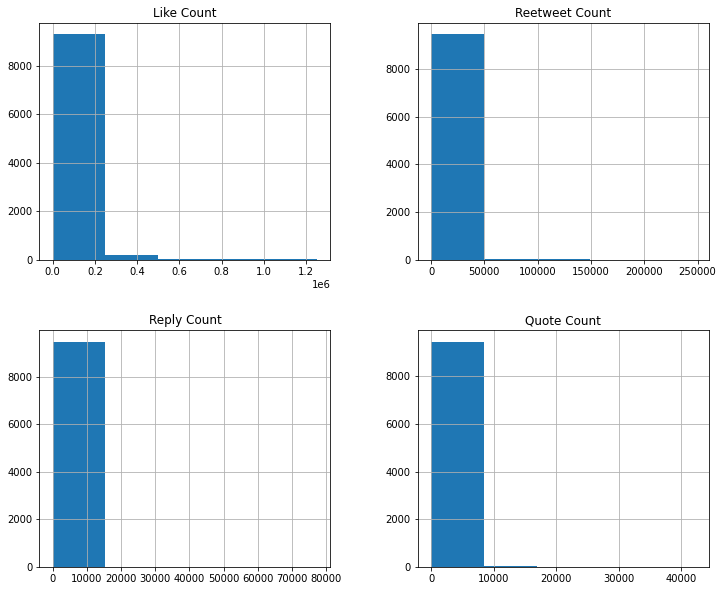

In [ ]:
# plot a histogram of all columns
df.hist(figsize=(12, 10), bins=5)
plt.show()

### 4.2.1.3 - Pair plot
The pair plot function created a grid of scatterplots and histograms for each pair of numerical variables in our dataset. It allowed us to visualise the pairwise relationships between different variables and identify potential issues and patterns.

The scatterplots illustrate a robust positive correlation between 'Like Count', 'Retweet Count', 'Reply Count' and 'Quote Count'. Each of the variables has a lot of outliers, which are data points that fall far outside the range of the other data points. Identifying and manipulating the outliers is crucial because they can skew statistical analyses and lead to inaccurate results.

However, the histograms on the diagonal of the plot were somewhat challenging to interpret due to the extensive range of likes counts. It made it challenging to plot the histogram bins accurately for the distribution of each variable.

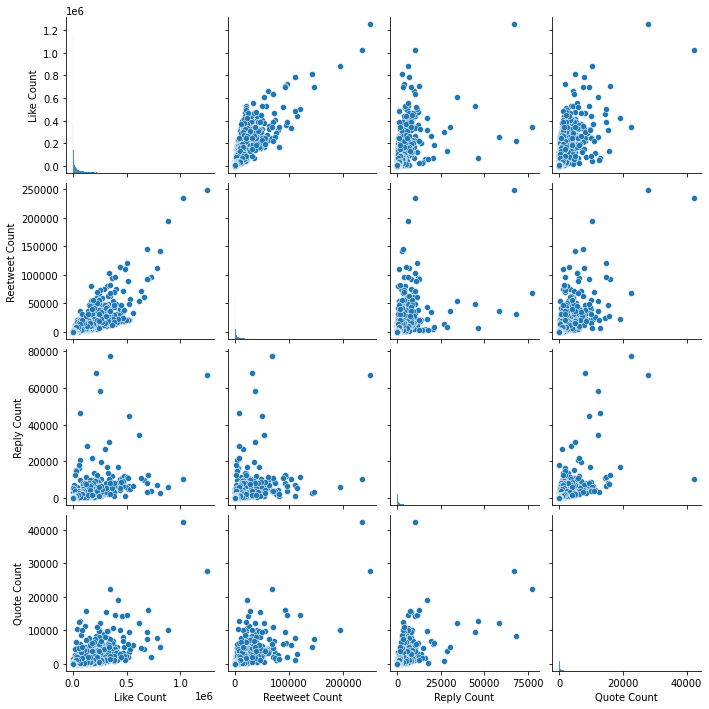

In [ ]:
sns.pairplot(df)

In [ ]:
# calculate the mean and standard deviation of each column
mean = df.mean()
std = df.std()

# print the mean and standard deviation
print(mean)
print(std)

Like Count        34987.310425
Reetweet Count     3113.920312
Reply Count         679.265837
Quote Count         300.979551
dtype: float64
Like Count        69925.895572
Reetweet Count     8510.319206
Reply Count        2115.864877
Quote Count        1086.652302
dtype: float64


<ipython-input-499-0520a5f6b4b8>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()
<ipython-input-499-0520a5f6b4b8>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = df.std()


## 4.2.2- One user EDA
While exploring EDA, I discovered that focusing on a single user's data is more crucial than multiple users. When attempting to analyse multiple users' data, it often results in much noise, making it challenging or even impossible to identify trends or patterns. To overcome this hurdle, I conducted EDA on Lewis Hamilton's tweets from 2018 to 2022. It allowed me to gain more valuable insights into the data, enabling me to identify patterns and relationships between variables, detect outliers, and generate hypotheses for further investigation. By exploring the data this way, I better understood the underlying structure and relationships, which will help conduct further analysis and modelling.

### 4.2.2.1 - Columns Corrolations

In this section, the code creates a heatmap to illustrate the correlation between the columns of data. Correlation is a measure of the strength of the relationship between two variables. It ranges from -1 (a perfect negative correlation) to 1 (a perfect positive correlation). Heatmaps help identify the columns that are most strongly correlated with one another.


-------------------------------------------------------------------------------


Based on the data, the like count has the strongest correlation among all the columns. It is because liking a tweet is the easiest and quickest user interaction. It only takes one click to indicate that a user likes a tweet, making it the most effortless way to engage with a tweet.

The retweet count has a weaker correlation than likes but is still more significant than other columns. It is because retweeting requires more effort than simply liking a tweet. Retweeting involves taking responsibility for sharing a tweet on a personal account, as well as adding a comment to the retweet. However, a likeable tweet still has a higher chance of being shared so retweets can indicate a tweet's popularity.

The replay count has the weakest correlation among all the columns. Replying to a tweet requires a similar effort of clicking and writing, but it is more effortful than liking a tweet. Generally, if a tweet is likeable, users are more inclined to share it than to reply. However, controversial tweets may have a higher replay count, as users are likelier to share their opinions through replies.

The like count is the most critical metric for measuring a tweet's popularity because it requires the least user effort. However, the retweet and replay counts can also provide valuable insights into a tweet's engagement and reach.

A clear pattern emerges when analysing the discussed behaviours. The like count consistently surpasses the retweet count, which holds the second-highest count. The replay count follows the retweet count, with the third highest count, and the quote count comes in last. Observing these tendencies makes it possible to predict the like count by manually calculating the average ratios between the like count and retweet, replay, and quote count. By obtaining ratio values, it is possible to make a rough calculation or "prediction" of the like count.

After realising this pattern, I ultimately decided to discard these features despite having trained a few models with them. The main reason for this decision was that the calculations could be performed manually, rendering a model unnecessary.

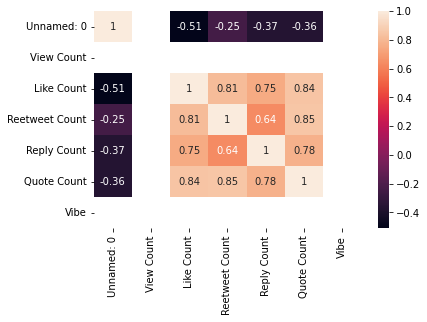

In [ ]:
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.show()

### 4.2.2.2 - Tweets
In this section, the code extracts the month information from the "Date" column and uses it to group the data by month and count the number of tweets in each group. The code then creates a line plot to visualise the number of tweets per month. This section's second part focuses on grouping the data by year and month and creating a line chart of the tweet counts per month in each year. 

These plots help identify trends and patterns in the data over time. Furthermore, assist in identifying seasonal patterns and determining if significant changes have occurred.

-------------------------------------------------------------------------------

The graph presented in the previous section shows a correlation between tweet count and the F1 season. As the F1 pre-testing starts in February, there is a notable increase in monthly tweets from January to February, with the tweet count rising from less than 40 to 90. Once the official season commences in March, there is a significant surge in tweet count. However, during the racing period from May to June, the tweet count slightly declined due to the races' busyness. Despite this, tweet counts start to climb again due to the mid-season before breaking up for the summer break. There is a substantial drop in tweet count during the summer break from July to August. However, the tweet count picks up again after the break from August to October. Nevertheless, after November, as the season comes to a close, there is a noticeable decline in tweet count, dropping from 110 to 50 in December, a 50% decrease. The line plot of the tweet counts per month helps to identify these patterns, enabling the recognition of seasonal trends and significant changes over time.


**Sources**

Website: https://www.formula1.com/en/latest/article.formula-1-announces-23-race-calendar-for-2022.2HcIP34fK3Zznx7YZfWL6P.html

Website: https://www.autosport.com/f1/news/what-is-f1s-summer-break-why-does-it-happen-and-how-long-is-it/10345377/#:~:text=This%20rule%20is%20implemented%20by,including%20planning%20or%20hold%20meetings.

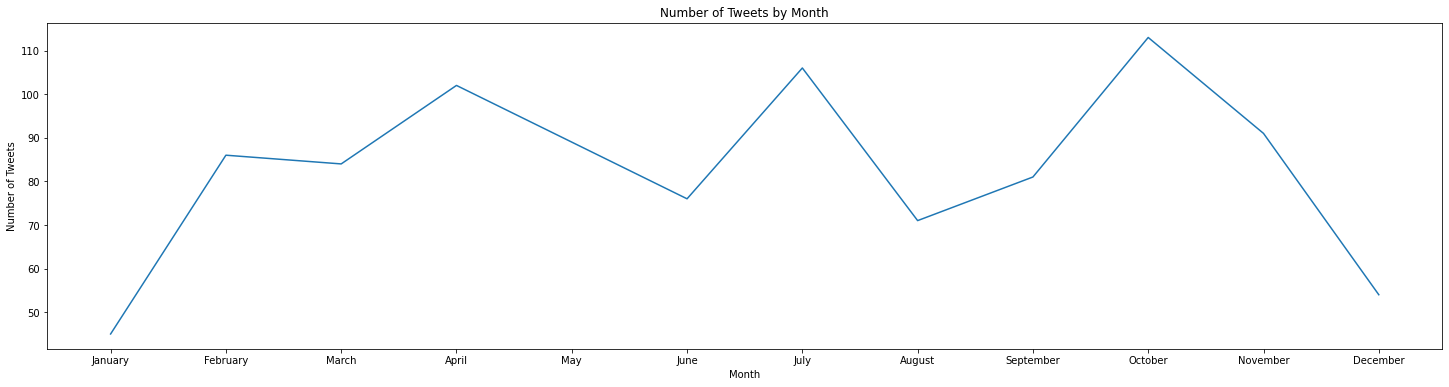

In [ ]:
# Extract the month information from the "Date" column
df['Month'] = pd.DatetimeIndex(df['Date']).month

# Group the data by the month and count the number of tweets in each group
grouped = df.groupby(['Month']).size().reset_index(name='Count')

# Plot the number of tweets per month using lineplot
plt.figure(figsize=(25, 6))
sns.lineplot(x='Month', y='Count', data=grouped)

# Set the x-axis labels
plt.xticks(grouped['Month'], calendar.month_name[1:13])

# Add the title and axis labels
plt.title("Number of Tweets by Month")
plt.xlabel("Month")
plt.ylabel("Number of Tweets")

plt.show()

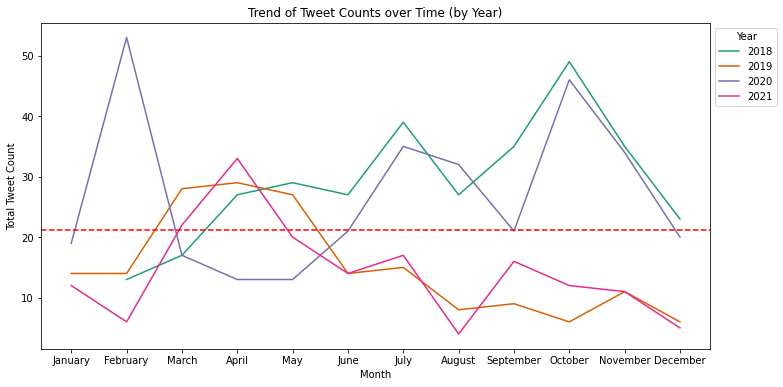

In [ ]:
# Extract the year and month information from the "Date" column
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

# Group the data by the year and month and count the number of tweets in each group
grouped = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Plot the line chart of tweet counts per month in each year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Count', hue='Year', data=grouped, palette='Dark2')

# Set the x-axis labels
plt.xticks(range(1, 13), calendar.month_name[1:13])

# Add the title and axis labels
plt.title("Trend of Tweet Counts over Time (by Year)")
plt.xlabel("Month")
plt.ylabel("Total Tweet Count")

# Add the legend
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

# Calculate the mean of the 'Count' column
mean = grouped['Count'].mean()

# Plot a horizontal line at the mean value
plt.axhline(y=mean, color='red', linestyle='--')

plt.show()

### 4.2.2.3 - Like
This section of the code is focused on the "Like Count" column, which represents the number of likes each tweet received. The first plot in this section is a line plot of the "Like Count" column over time. The second plot is similar to the second plot in section 4.2.2.2. Instead of counting tweets, it sums up the "Like Count" column and shows the total likes per month in each year.

-------------------------------------------------------------------------------

The graph illustrates the unique character of account growth through increases in like count. Before 2020, the average number of likes per tweet was less than 2500. However, after 2020, there was a significant increase in likes count. 

Typically, if the user is a public or influential figure, the account will experience growth over time as long as the user remains active. In Lewis Hamilton's case, there was explosive growth due to a massive boost in the sport's popularity after F1's acquisition by Liberty Media.

The second graph contrasts the average likes per tweet before and after the acquisition (2018-2019 vs 2020-2021). In the earlier period, the maximum number of likes per tweet was only 0.5 (1e6), while the latter period saw a tremendous increase, with a maximum of 1.6 (1e6) likes per tweet. 

These plots are valuable in identifying seasonal patterns and significant changes that may have occurred over time, providing insights into the account's performance and the factors contributing to its growth.

**Sources:**
Website: https://www.racefans.net/2021/10/06/what-has-liberty-achieved-in-the-five-years-since-it-arrived-in-formula-1/


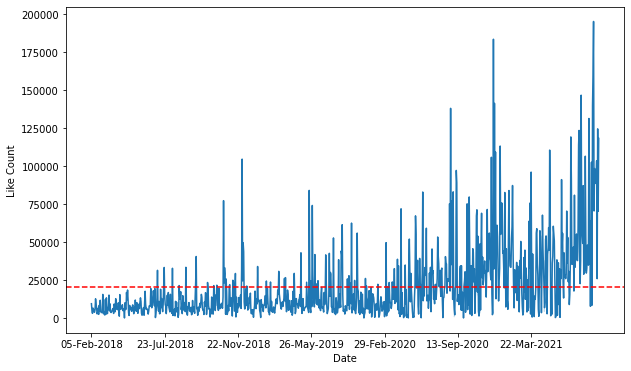

In [ ]:
# Sort the dataframe by the 'Date' column
df = df.sort_values('Date')

# Set the figure size to 10 inches wide by 6 inches tall
plt.figure(figsize=(10, 6))

# Plot the 'Date' and 'Like Count' columns
ax = sns.lineplot(x='Date', y='Like Count', data=df)

# Calculate the mean of the 'Like Count' column
mean = df['Like Count'].mean()

# Plot a horizontal line at the mean value
plt.axhline(y=mean, color='red', linestyle='--')

# Limit the number of x-axis tick labels
num_ticks = 7
x_labels = ax.get_xticks()[::int(len(df)/num_ticks)]
tick_locations = ax.get_xticks()[::int(len(df)/num_ticks)]
x_labels = [datetime.strptime(str(d)[:-6], '%Y-%m-%d %H:%M:%S').strftime('%d-%b-%Y') for d in df['Date'][::int(len(df)/num_ticks)+1]]
ax.set_xticks(tick_locations)
ax.set_xticklabels(x_labels)

plt.show()

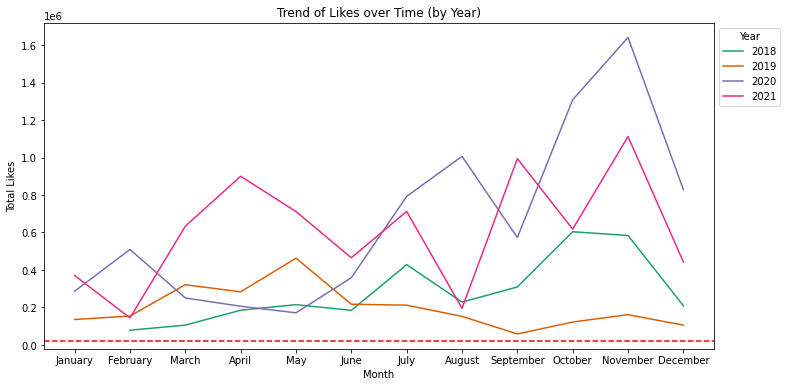

In [ ]:
# Extract the year and month information from the "Date" column
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

# Group the data by the year and month and sum the 'Like Cout' in each group
grouped = df.groupby(['Year', 'Month']).sum().reset_index()

# Plot the line chart of likes per month in each year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Like Count', hue='Year', data=grouped, palette='Dark2')

# Set the x-axis labels
plt.xticks(range(1, 13), calendar.month_name[1:13])

# Add the title and axis labels
plt.title("Trend of Likes over Time (by Year)")
plt.xlabel("Month")
plt.ylabel("Total Likes")

# Add the legend
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

# Calculate the mean of the 'Like Cout' column
mean = df['Like Count'].mean()

# Plot a horizontal line at the mean value
plt.axhline(y=mean, color='red', linestyle='--')

plt.show()

### 4.2.2.4 - Count Mentions

In this section, the code defines a function to extract the number of mentions in a tweet and then adds a new column to the DataFrame to store the extracted feature. The count of mentions is plotted to see the distribution of mentions in tweets, and a scatter plot is used to see if there is any correlation between the count of mentions and likes.

-------------------------------------------------------------------------------

At first, there was a belief that a mention in a tweet would have a significant impact on the number of likes. It was based on the assumption that when someone is mentioned in a tweet, their followers would also see the tweet and engage with it, leading to increased exposure and, subsequently, more likes.

However, the graph data revealed that this was not necessarily the case. Approximately half of the 500 tweets analysed had no mentions, while the rest had one or more mentions. It was unexpected, as it was previously assumed that most tweets would have at least one mention.

Furthermore, it was surprising to find that the tweet with the most likes had no mentions at all. This tweet even outperformed tweets that had over 100k likes, which was an intriguing finding. Other factors might influence the number of likes a tweet receives besides mentions.

Overall, the data showed that mentions might not be as influential in driving likes as previously thought. However, more analysis is needed to determine what other factors might be at play in influencing engagement on Twitter.

In [ ]:
# Define a function to extract the number of mentions in a tweet
def count_mentions(tweet):
    return len(re.findall(r'@\w+', tweet))

# Add columns to the DataFrame to store the extracted features
df['Mention Count'] = df['Tweet'].apply(count_mentions)

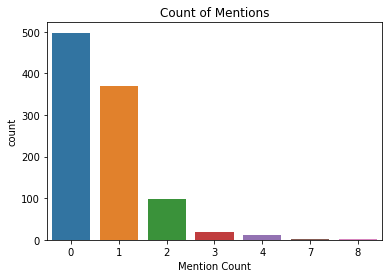

In [ ]:
# Plot the count of mentions
sns.countplot(x='Mention Count', data=df)
plt.title("Count of Mentions")
plt.show()

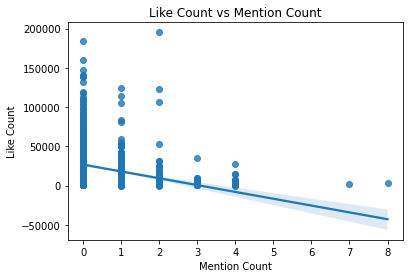

In [ ]:
# Plot the count of mentions
sns.regplot(x=df['Mention Count'], y=df['Like Count'])
plt.title("Like Count vs Mention Count")
plt.xlabel("Mention Count")
plt.ylabel("Like Count")
plt.show()

### 4.2.2.5 - Hashtags Count

This section of the code is focused on the "Hashtags" column, which contains a comma-separated list of hashtags used in each tweet. The code first creates a new column with the count of hashtags and then creates several plots to visualise the distribution of hashtags in the data. 

These plots include a barplot for the number of tweets with a certain number of hashtags, a barplot for the total number of hashtags used each month, and a scatterplot showing the relationship between the number of hashtags in a tweet and the number of likes it received.

-------------------------------------------------------------------------------

Using hashtags may only sometimes lead to a significant increase in the number of likes, despite the assumption that it will. Hashtags do increase the visibility of a tweet to followers interested in a specific topic, which can allow the Twitter algorithm to promote it more effectively. However, this increased exposure may only sometimes translate to a more significant number of likes, despite the theoretical expectation.

Interestingly, most tweets do not have any hashtags. Surprisingly, over 550 tweets with no hashtags have received a greater count of likes, over 100k likes. The tweet's performance may be better with fewer hashtags. 

In summary, while hashtags can help increase a tweet's visibility, they only sometimes guarantee a higher number of likes. Moreover, tweets with no hashtags can still receive impressive likes, indicating that fewer hashtags could lead to better performance.

In [ ]:
# Create a new column with the count of hashtags
df['Hashtag Count'] = df['Hashtags'].apply(lambda x: len(x.split(',')) if type(x) == str else 0)

In [ ]:
hashtag_counts = df['Hashtag Count'].values
mean = np.mean(hashtag_counts)
max_value = np.max(hashtag_counts)
min_value = np.min(hashtag_counts)
total = np.sum(hashtag_counts)

print("Mean:", mean)
print("Max:", max_value)
print("Min:", min_value)
print("Total:", total)

Mean: 0.8236472945891784
Max: 7
Min: 0
Total: 822


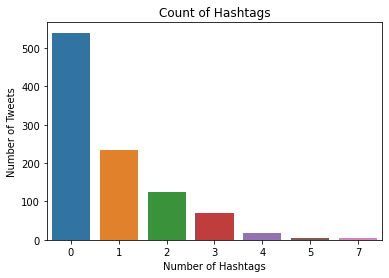

In [ ]:
# Group the DataFrame by number of hashtags and count the number of tweets
hashtag_counts = df.groupby('Hashtag Count')['Tweet'].count()

# Plot the count of hashtags
sns.barplot(x=hashtag_counts.index, y=hashtag_counts.values)
plt.title("Count of Hashtags")
plt.xlabel("Number of Hashtags")
plt.ylabel("Number of Tweets")
plt.show()

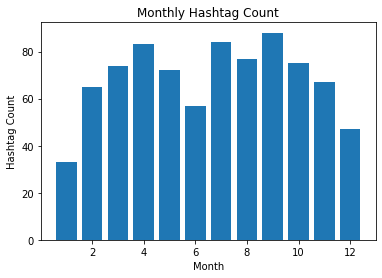

In [ ]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the 'Date' column and store it in a new column
df['Month'] = df['Date'].dt.month

# Group the data by month and sum the 'Hashtag_Count' column
monthly_count = df.groupby(['Month'])['Hashtag Count'].sum()

# Plot the monthly hashtag count
plt.bar(monthly_count.index, monthly_count.values)
plt.xlabel("Month")
plt.ylabel("Hashtag Count")
plt.title("Monthly Hashtag Count")
plt.show()

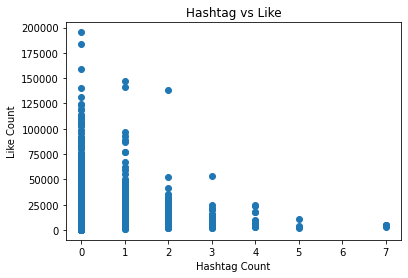

In [ ]:
plt.scatter(df['Hashtag Count'], df['Like Count'])
plt.title("Hashtag vs Like")
plt.xlabel("Hashtag Count")
plt.ylabel("Like Count")
plt.show()

### 4.2.2.6 - Emoji Count

In this section, the code defines a function to extract the number of emojis in a tweet and adds a new column to the DataFrame to store the extracted feature.

The code creates a count plot of the number of emojis in each tweet. Then the code also creates a scatterplot that shows the relationship between the number of emojis in a tweet and the number of likes it received.


-------------------------------------------------------------------------------


The hypothesis was that emojis in tweets could lead to more likes and retweets, particularly among younger audiences. The graphs showed that over 500 tweets had one emoji, and only around 330 with no emoji. It further reinforces the emphasis on emoji use. As a result, it was surprising to find that tweets with 0 or at least one emoji had a similar count of likes greater than 100k as tweets with one or more emoji.

Based on the findings, emojis may not significantly impact tweet engagement regarding likes. However, emojis are still beneficial to make the content more appealing to the audience, particularly younger individuals who are more receptive to this form of communication.

In [ ]:
# Define a function to extract the number of emojis in a tweet
def count_emojis(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
                           "]+", flags=re.UNICODE)
    return len(emoji_pattern.findall(tweet))

df['Emoji Count'] = df['Tweet'].apply(count_emojis)

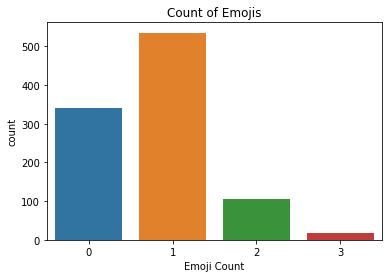

In [ ]:
# Plot the count of emojis
sns.countplot(x='Emoji Count', data=df)
plt.title("Count of Emojis")
plt.show()

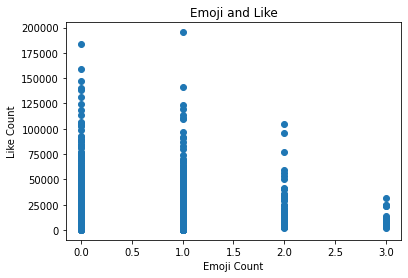

In [ ]:
# Plot the emoji and like count
plt.scatter(df['Emoji Count'], df['Like Count'])
plt.title("Emoji and Like")
plt.xlabel("Emoji Count")
plt.ylabel("Like Count")
plt.show()

### 4.2.2.7 - Tweet Language

The code in this section is specifically focused on the language of Lewis Hamilton's tweets. The first plot is a count plot that displays the distribution of tweets in each language. Meanwhile, the second plot is a scatterplot that illustrates the correlation between the language of the tweets and the number of likes received.


-------------------------------------------------------------------------------


It is worth noting that Lewis Hamilton has tweeted in 19 different languages, catering to his diverse fan base. Despite this, he predominantly uses English, having around 900 tweets in this language. Furthermore, his English tweets have received the most likes, exceeding 100k counts. This highlights that using English in the tweets is the best approach to effectively engage with his global audience.

**TALK ABOUT HOW LANGUAGE CAN HAVE A BIG IMPACT**

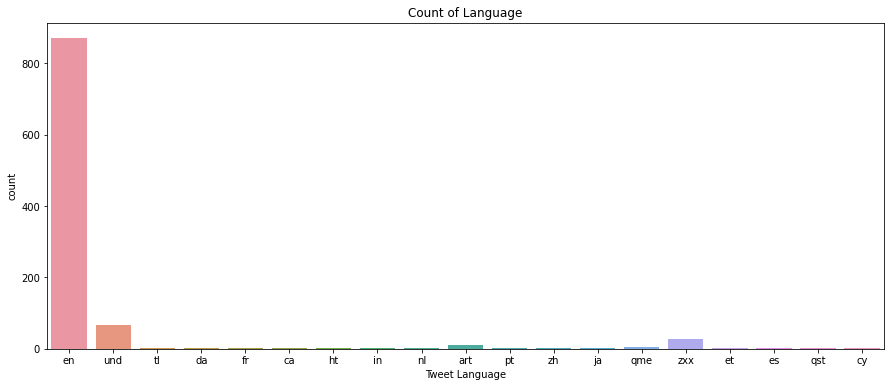

In [ ]:
# Plot the count of language
plt.figure(figsize=(15,6))
sns.countplot(x='Tweet Language', data=df)
plt.title("Count of Language")
plt.show()

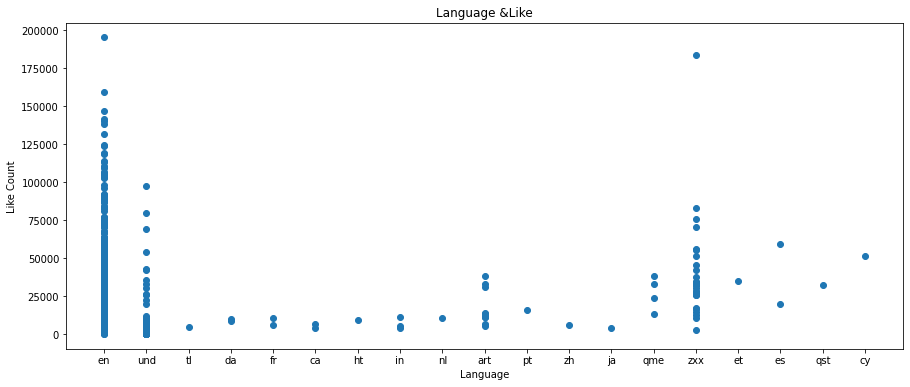

In [ ]:
# Plot the count of words
plt.figure(figsize=(15,6))
plt.scatter(df['Tweet Language'], df['Like Count'])
plt.title("Language &Like")
plt.xlabel("Language")
plt.ylabel("Like Count")
plt.show()

### 4.2.2.8 - Word Count

This section of the code focuses on the tweets' word count. A new column called "Word Count" is added to the DataFrame using the apply method to count the number of words in each tweet by splitting the text into spaces and taking the length of the resulting list. 

Two plots are then created to visualise the distribution of word counts in the tweets. The first plot shows the number of tweets and their word count. The second plot is a KDE plot that shows the relationship between the word count and the number of likes. The shade of the plot represents the density of points in the plot, with red indicating higher density. 


-------------------------------------------------------------------------------


The word count of a tweet is essential to predicting its engagement metrics, such as the number of likes it receives. In order to gain insight into what type of tweets perform best, one must analyse the relationship between the word count and engagement metrics. 

The graph shows that tweets with a word count between 10 and 20 words tend to receive the most likes. Most of Lewis's tweets are concise, mainly containing words in the range of 1 to 13.

The word count distribution of the tweets can also be used to identify trends or patterns within the data, which may be used to gain further insight and analysis. For this reason, it is crucial to understand the word count of a tweet in order to analyse its performance.


In [ ]:
df['Word Count'] = df['Tweet'].apply(lambda x: len(x.split()))

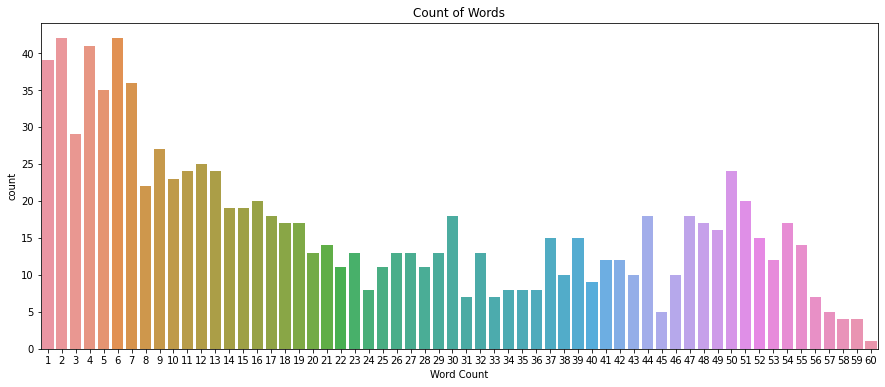

In [ ]:
# Plot the count of words
plt.figure(figsize=(15,6))
sns.countplot(x='Word Count', data=df)
plt.title("Count of Words")
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


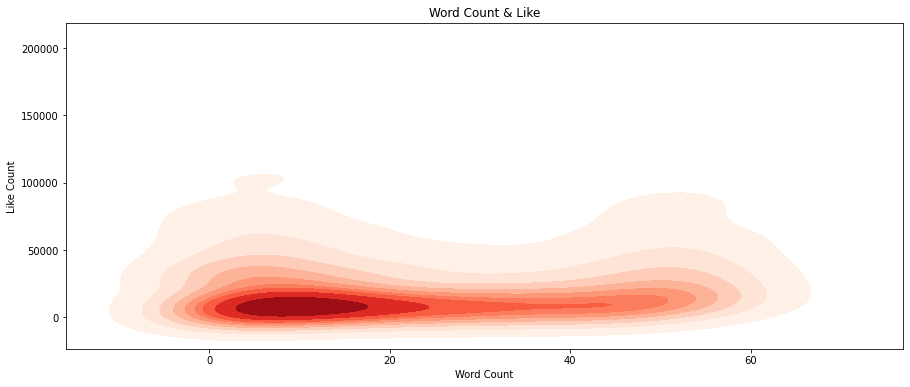

In [ ]:
# Plot the count of words
plt.figure(figsize=(15,6))
sns.kdeplot(df['Word Count'], df['Like Count'], shade=True, cmap='Reds')
plt.title("Word Count & Like")
plt.xlabel("Word Count")
plt.ylabel("Like Count")

plt.show()

### 4.2.2.9 - Tweet Sentiment

This section performs sentiment analysis on the tweets using a pre-trained model called "twitter-roberta-base-sentiment". The sentiment model is loaded, and a function named "tweetSentiment" is defined, which preprocesses each tweet and passes it to the model to get the sentiment score. The sentiment scores are then converted to labels, such as 'Negative', 'Neutral', and 'Positive'.

First, a bar chart is plotted with the number of tweets computed for each sentiment category. Then, a scatter plot is created with the number of likes and the sentiment of each tweet.

-------------------------------------------------------------------------------

The purpose of tweet sentiment analysis is to extract personal information from the text of tweets and determine whether they express a positive or negative sentiment by using natural language processing, text analysis, and computational linguistics techniques. The purpose of tweet sentiment analysis is to identify the emotions, opinions, and attitudes expressed in a tweet and classify them into different categories, such as positive, negative, or neutral, based on the content of that tweet.

Tweet sentiment analysis can be used for various purposes, such as identifying followers' sentiments towards a Twitter user, understanding public opinion about a political issue, or monitoring social media for potential crises.


The analysis revealed that Lewis had posted roughly 800 tweets with a positive sentiment and approximately 200 with a neutral or negative sentiment. The positive tweets received significantly higher engagement, with over 100,000 likes, while the neutral and negative tweets had a similar distribution of likes, with most receiving 75,000 or less. Thus, understanding the sentiment of tweets is crucial as it can aid the model in predicting better outcomes.

**Source:**

Website: https://medium.com/mlearning-ai/tweets-sentiment-analysis-with-roberta-1f30cf4e1035

In [ ]:
def tweetSentiment(tweet):
    # pre-process tweet to remove @ and links
    tweet_words = []
    for word in tweet.split(' '):
        if word.startswith('@') and len(word) > 1:
            word = '@user'
        elif word.startswith('http'):
            word = "http"
        tweet_words.append(word)
    tweet_proc = " ".join(tweet_words)

    # load model and tokenizer
    roberta = "cardiffnlp/twitter-roberta-base-sentiment"
    model = AutoModelForSequenceClassification.from_pretrained(roberta)
    tokenizer = AutoTokenizer.from_pretrained(roberta)

    # sentiment analysis
    input_ids = tokenizer.encode(tweet_proc, return_tensors='pt')
    with torch.no_grad():
        output = model(input_ids)
    sentiment_logits = output[0][0].tolist()
    sentiment = torch.softmax(torch.tensor(sentiment_logits), dim=-1)
    sentiment_scores = sentiment.tolist()
    sentiment_labels = ['Negative', 'Neutral', 'Positive']

    max_score_index = sentiment_scores.index(max(sentiment_scores))
    return sentiment_labels[max_score_index]

df['Tweet Sentiment'] = np.vectorize(tweetSentiment)(df['Tweet'])
df['Tweet Sentiment']

997    Positive
996    Positive
995    Positive
994    Positive
993    Positive
         ...   
4      Positive
3      Positive
2      Positive
1       Neutral
0      Positive
Name: Tweet Sentiment, Length: 998, dtype: object

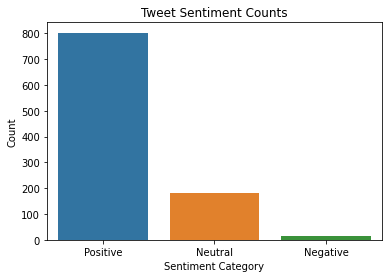

In [ ]:
# Compute the count of each tweet sentiment category
sentiment_count = df['Tweet Sentiment'].value_counts()

# Plot a bar chart of the tweet sentiment counts
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_count.index, y=sentiment_count.values)
plt.title("Tweet Sentiment Counts")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

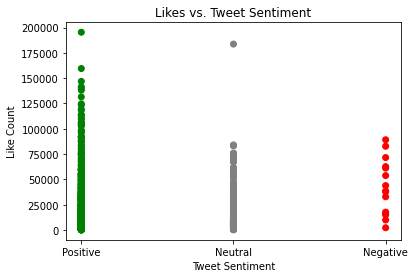

In [ ]:
# Sample data
sentiments = df['Tweet Sentiment']
likes = df['Like Count']

# Define color map for sentiment labels
colors = {'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'}
sentiment_colors = [colors[sentiment] for sentiment in sentiments]

# Create scatter plot
fig, ax = plt.subplots()
ax.scatter(sentiments, likes, color=sentiment_colors)

# Set plot labels and title
ax.set_xlabel('Tweet Sentiment')
ax.set_ylabel('Like Count')
ax.set_title('Likes vs. Tweet Sentiment')

# Display plot
plt.show()

### 4.2.2.10 - Tweet Vulgarity

In this section, a function named "check_tweet_vulgarity" is defined to check whether a tweet is vulgar. This function takes a tweet as input and preprocesses it by removing digits and punctuation and converting all the characters to lowercase. Then, it checks the tweet against a list of vulgar words and a list of vulgar emojis. If any vulgar word or emoji is present in the tweet, the function returns True, indicating that the tweet is vulgar. The second cell stores the index of rows containing vulgar tweets in a list called "count". 

Then, the mean number of likes for the vulgar and non-vulgar tweets is computed and compared.

------------------------------------------------------------------------

Tweet vulgarity analysis is a process that involves analysing the language and content of tweets to identify and categorise vulgar or offensive language. This type of text classification can be done using various techniques such as rule-based approaches, machine learning, or deep learning.

The use of vulgar language in tweets can substantially impact the number of likes and engagements a tweet receives. On average, tweets containing vulgar language receive 13,695 likes, significantly lower than the average like count of 20,916 for tweets that do not contain vulgar language. It is likely due to users finding the language inappropriate or offensive and social media platforms' policies against hate speech, bullying, and other abusive behaviour. It may lead to removing or penalising such tweets, decreasing their visibility and engagement.

In conclusion, the analysis of vulgarity in tweets can significantly improve the accuracy of the prediction model for the number of likes. As we have discussed, tweets containing vulgar language tend to receive fewer likes.

In [ ]:
def check_tweet_vulgarity(tweet):
    # Define a list of vulgar words to check against
    vulgar_words = pd.read_csv('vulgar_words.csv')
    vulgar_emojis = ["🖕", "👉👌", "🍆", "🍑", "💩", "👅", "👀", "🙊", "🙉", "🙈", "🤢", "🤮", "🤬", "😈", "👿", "💀", "🔪", "🩸", "🧻","🍆💦"]

    # Preprocess tweet
    tweet = tweet.lower()
    tweet = re.sub(r'\d+', '', tweet)  # Remove digits
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation

    # Check for vulgar words
    for word in tweet.split():
        if word in vulgar_words:
            return True

    # Check for vulgar emojis
    for emoji in vulgar_emojis:
        if emoji in tweet:
            return True

    return False

  
# Example usage
df['Tweet Vulgarity'] = np.vectorize(check_tweet_vulgarity)(df['Tweet'])

In [ ]:
# Storing the index of the row that has vougar tweet
count = []
index = 0
for cell in df['Tweet Vulgarity']:
  index += 1
  if cell == True:
    count.append(index)
    
count

[19, 337, 401, 466, 528, 534, 550, 560, 607, 646, 784, 819, 873, 885, 916, 974]

In [ ]:
# Vulgar tweets likes mean
selected_rows = df.iloc[count]
selected_rows['Like Count'].mean()

In [ ]:
# Non vulgar tweets likes mean
not_selected_rows = df.loc[~df.index.isin(count)]
not_selected_rows['Like Count'].mean()

### 4.2.2.11 - Summary Plot

The features under consideration do not exhibit significant correlation due to the absence of linearity between the likes and other features. Nevertheless, the non-linear relationship between these features will require appropriate modelling techniques to ensure the model's highest predictive accuracy. While these features may not have a significant presence in the correlation matrix, they still hold value and should not be disregarded. The effectiveness of these features in predicting the outcome will be evaluated during testing.

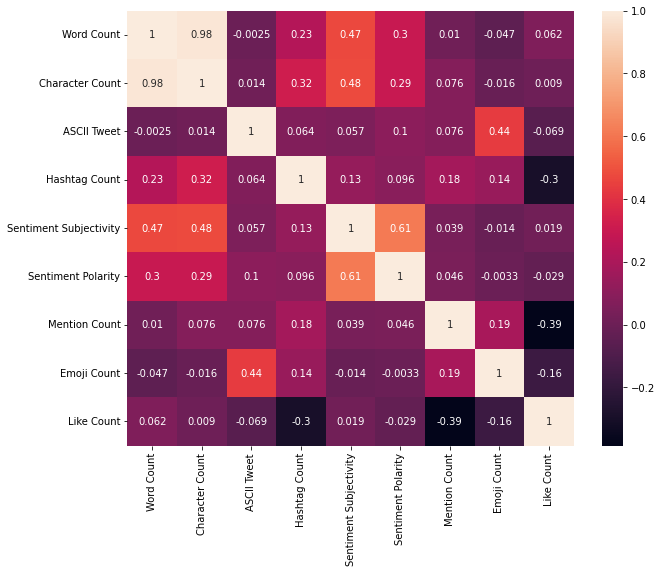

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Define the columns to plot
columns_to_plot = ['Word Count', 'Character Count', 'ASCII Tweet', 'Hashtag Count',
                   'Sentiment Subjectivity', 'Sentiment Polarity', 'Mention Count',
                   'Emoji Count', 'Like Count']

# Calculate the correlation matrix for all columns in the dataframe
correlation = df.corr()

# Subset the correlation matrix to only include the desired columns
corr_subset = correlation.loc[columns_to_plot, columns_to_plot]

# Plot the heatmap
sns.heatmap(corr_subset, annot=True)
plt.show()

# 4.3 - Data processing:

### 4.3.1 - Data Cleaning:

In data cleaning, errors, inconsistencies, and inaccuracies are identified, corrected, or removed. In data analysis, this is an essential step since the accuracy and quality of data can significantly impact the insights derived and the decisions made based on them.


As part of the data-cleansing process, the following steps have been taken:
- Checking columns data types: The first step involves checking the 'dtypes' attribute in the dataset to determine the data type of each column. This procedure helps identify any columns that may have been assigned the wrong data type.
- Convert the 'Date' column to DateTime format: In the event that the 'Date' column does not already have a DateTime format, it will be converted using the 'pd.to_datetime' function. It is essential since the DateTime format facilitates the manipulation and analysis of dates.
- Checking for null values: 
The next step is identifying any null or missing values in the dataset using the 'isnull' function. Removing or imputing null values is vital as they may cause analysis issues.
- Dropping columns with all rows null: The null columns only add noise to the analysis. Therefore it is a wise consideration to drop them. The 'drop' method call can drop any columns in the dataset with all their rows as null. 
- Replacing the nan with 0: In other columns, null values can be imputed with a value such as 0, which indicates that a value is missing while permitting analysis using the non-missing values.
- Dropping all the duplicate rows from the DataFrame: There are numerous reasons why duplicate rows can occur, such as data entry errors or system malfunctions. It is possible to drop these duplicate rows from the dataset using the 'drop_duplicates' method call.
- Checking the DataFrame after cleaning: The cleaned dataset is printed to determine if all cleaning steps were successful.

These data-cleansing techniques ensure that the dataset is accurate, consistent, and complete, providing better insights and decision-making opportunities.


In [ ]:
# Checking columns data types
print(df.dtypes)

Unnamed: 0                       int64
Date               datetime64[ns, UTC]
User                            object
Tweet                           object
Tweet Language                  object
View Count                     float64
Like Count                       int64
Reetweet Count                   int64
Reply Count                      int64
Quote Count                      int64
Hashtags                        object
Vibe                           float64
inReplyToUser                   object
Mentioned Users                 object
Month                            int64
Year                             int64
Mention Count                    int64
Hashtag Count                    int64
Emoji Count                      int64
Word Count                       int64
Tweet Sentiment                 object
Tweet Vulgarity                   bool
dtype: object


In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date']).dt.tz_convert('UTC')
print(df.dtypes)

Unnamed: 0                       int64
Date               datetime64[ns, UTC]
User                            object
Tweet                           object
Tweet Language                  object
View Count                     float64
Like Count                       int64
Reetweet Count                   int64
Reply Count                      int64
Quote Count                      int64
Hashtags                        object
Vibe                           float64
inReplyToUser                   object
Mentioned Users                 object
Month                            int64
Year                             int64
Mention Count                    int64
Hashtag Count                    int64
Emoji Count                      int64
Word Count                       int64
Tweet Sentiment                 object
Tweet Vulgarity                   bool
dtype: object


In [ ]:
# Checking for null values
df.isnull().sum()

Unnamed: 0           0
Date                 0
User                 0
Tweet                0
Tweet Language       0
View Count         998
Like Count           0
Reetweet Count       0
Reply Count          0
Quote Count          0
Hashtags           540
Vibe               998
inReplyToUser      908
Mentioned Users    504
Month                0
Year                 0
Mention Count        0
Hashtag Count        0
Emoji Count          0
Word Count           0
Tweet Sentiment      0
Tweet Vulgarity      0
dtype: int64

In [ ]:
# Dropping columns that have all rows null
df = df.drop(columns=['View Count', 'Vibe'])

In [ ]:
# Replacing the nan with 0
df = df.fillna(value=0)

In [ ]:
# Dropping all the duplicate rows from the DataFrame
df = df.drop_duplicates()

In [ ]:
# Checking the DataFrame after cleaning
df.head()

,Unnamed: 0,Date,User,Tweet,Tweet Language,Like Count,Reetweet Count,Reply Count,Quote Count,Hashtags,inReplyToUser,Mentioned Users,Month,Year,Mention Count,Hashtag Count,Emoji Count,Word Count,Tweet Sentiment,Tweet Vulgarity
997,997,2018-02-05 19:10:18+00:00,LewisHamilton,The moment when a thousand years worth of work...,en,9503,1835,431,150,['W09Countdown'],0,"[User(username='MercedesAMGF1', id=26235265, d...",2,2018,1,1,1,31,Positive,False
996,996,2018-02-07 11:28:55+00:00,LewisHamilton,Proud of you Billy! 🙌🏾 https://t.co/bzZrim7hRD,en,5006,511,73,11,0,0,0,2,2018,0,0,1,6,Positive,False
995,995,2018-02-09 19:49:34+00:00,LewisHamilton,Shredding into the weekend like... 🙌🏾 #Monste...,en,3135,366,116,14,"['MonsterEnergy', 'SkiDoo']",0,0,2,2018,0,2,1,9,Positive,False
994,994,2018-02-15 21:48:51+00:00,LewisHamilton,"To all those celebrating, I'd like wish you a ...",en,6594,747,173,29,0,0,0,2,2018,0,0,1,47,Positive,False
993,993,2018-02-18 16:10:49+00:00,LewisHamilton,Hey @BubbaWallace! Wishing you the absolute be...,en,5862,711,117,111,0,0,"[User(username='BubbaWallace', id=55457727, di...",2,2018,1,0,2,15,Positive,False


#### 4.3.1.1 - Checking & Removing Like Count outliers:

This code removes outliers from a data frame df that contains tweet data. It does so by defining a threshold value of 80000 likes, which counts the number of tweets with more than this number of likes. The code then prints the tweets with more than the threshold number of likes.

The next part of the code filters the original DataFrame df to keep only the rows where the 'Like Count' column is less than or equal to the threshold value. It effectively removes any rows from the DataFrame where the number of likes exceeds the threshold value, which was identified as outliers in the first step.

So, this code removes the tweets from the DataFrame where the number of likes exceeds the threshold value, which was considered an outlier and could cause issues when training the model.


In [ ]:
# Define the threshold value
threshold = 80000

# Count the number of tweets with more than n likes
num_tweets = len(df[df['Like Count'] > threshold])

# Print the result
print(f"There are {num_tweets} tweets with more than {threshold} likes")

There are 38 tweets with more than 80000 likes


In [ ]:
# Define the threshold value
threshold = 80000

# Filter the dataframe to keep only rows where 'Like Count' is smaller than or equal to the threshold
df = df[df['Like Count'] <= threshold]

### 4.3.2 - Tweet Pre-Processing:

This section is focused on cleaning up the tweets and making them more readable for analysis. The first function, preprocess_tweet, remove URLs and punctuation from the tweets. The second function, remove_stopwords, remove stop words from the tweets. These functions are then applied to the 'Tweet' column of the data frame using the apply method and saved to a new column called 'New Tweet'.

In [ ]:
# Remove URLs and punctuation from tweets
def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    tweet = tweet.strip()
    return tweet

In [ ]:
# Remove stop words from tweets
stop_words = set(stopwords.words('english'))
def remove_stopwords(tweet):
    tokens = tweet.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    filtered_tweet = ' '.join(filtered_tokens)
    return filtered_tweet

In [ ]:
# Preprocess tweets 
df['New Tweet'] = df['Tweet'].apply(preprocess_tweet)
df['New Tweet'] = df['New Tweet'].apply(remove_stopwords)

### 4.3.3 - Tweet Sentiment Polarity & Sybjactivity:

This section adds sentiment analysis to the tweets. However, instead of using a pre-trained model as was done previously, it uses the TextBlob library. The main reason for the switch was that the model was extremely slow compared to TextBlob. 

The add_sentiment function applies the TextBlob sentiment analysis to each tweet and returns the subjectivity and polarity scores. The scores are then saved to new columns in the DataFrame called 'Sentiment Subjectivity' and 'Sentiment Polarity'.

In [ ]:
# Add sentiment analysis to tweets
def add_sentiment(tweet):
    blob = TextBlob(tweet)
    return blob.sentiment.subjectivity, blob.sentiment.polarity

In [ ]:
# Tweets sentiment  and polarity analysis
df['Sentiment Subjectivity'], df['Sentiment Polarity'] = zip(*df['Tweet'].apply(add_sentiment))

### 4.3.2 - Tweet Conversion To Numerical Form:

The purpose of this section is to convert tweets from string form into numerical form in order to analyse them. The function string_to_ascii_decimal converts each character in the tweet string into its ASCII decimal value and then sums these values to determine the total numerical representation of the tweet. The Tweet in decimal form is saved in a new column called 'ASCII Tweet' in the DataFrame. 

Additionally, the code in the second cell generates a new column in the DataFrame called 'Character Count', which stores the number of characters in each tweet.

--------------------------------------------------------------------------------

When converting a string into ASCII values, the resulting numbers may not be unique. It is because different combinations of characters can add up to the same numeric value.

For example, the string "ABC" can be represented in ASCII as "198"(65+66+67). However, the string "BAC" can also be represented as "198", which is the same numeric value. However, when considering a string's word count and character count, the resulting values will likely be unique. The word count refers to the number of words in the string, while the character count refers to the total number of characters in the string.

For example, the string "The quick brown fox jumps over the lazy dog" has a word count of 9 and a character count of 43. This combination of values is less likely to be repeated in other strings, as it depends on the specific composition and length of the string.

Therefore, while converting a string into ASCII values can be helpful in specific contexts, more than relying on this method for uniqueness may be required. Additional factors such as word count and character count can provide a more robust measure of uniqueness.


In [ ]:
# Converting the string to ascii form
def string_to_ascii_decimal(string):
    ascii_values = [ord(char) for char in string]
    return sum(ascii_values)

In [ ]:
df['ASCII Tweet'] = df['New Tweet'].apply(string_to_ascii_decimal)

In [ ]:
# Generating character count
df['Character Count'] = df['Tweet'].apply(len)

### 4.3.2 - Split User Data In Unique CSV Files:
The data of each user is saved to a separate CSV file. It is helpful for further analysis where we may focus on one user's data at a time. 

The step is to get a list of all the unique users in the DataFrame. Then, for each user, a new DataFrame is created with only their data using boolean indexing. Finally, the DataFrame is saved to a CSV file with the user's name as the file name.

In [ ]:
# Save DataFrame to CSV files, one per user
users = df['User'].unique()
for user in users:
    user_df = df[df['User'] == user]
    if not os.path.exists('Data Preprocessing'):
        os.makedirs('Data Preprocessing')
    user_df.to_csv(f'Data Preprocessing/{user}.csv', index=False)

# 4.4 - Regression analysis:

### 4.4.1 - Data Loading & Preparing:

The three functions aim to load the features and labels from a CSV file, but they differ in selecting and preprocessing the data.
- The first function (load_data version 1) selects specific columns from the CSV file and returns them as the features (X) and labels (y). The selected columns are ['Retweet Count', 'Reply Count', 'Quote Count'] for features and 'Like Count' for the label.
- The second function (load_data version 2) selects different columns from the CSV file and performs some preprocessing steps. It selects the columns ['ASCII Tweet', 'Sentiment Polarity'] for features and 'Like Count' for the label. It also drops any rows with missing values and converts non-numeric columns to a numeric type.
- The third function (load_user_data) is more complex and can load data from multiple CSV files. It reads in a CSV file for a specific user (if provided) and selects specific columns for the features and labels. The selected columns are ['Word Count','Character Count', 'ASCII Tweet', 'Hashtag Count', 'Sentiment Subjectivity', 'Sentiment Polarity', 'Mention Count', 'Emoji Count', 'Like Count']. It also drops any rows with missing values and converts non-numeric columns to a numeric type. If no user is provided, it loads and concatenates data from all CSV files in the specified directory and returns the concatenated features and labels.


In summary, the three functions differ in selecting columns, handling missing values, and preprocessing non-numeric columns, but they all aim to load features and labels from a CSV file.

#### 4.4.1.2 - Load Features and Lables Version 1:

In [ ]:
def load_data(file_path):
    # Read the data from the CSV file
    data_df = pd.read_csv(file_path)
    
    # Select the relevant columns
    feature_cols = ['Reetweet Count', 'Reply Count', 'Quote Count']
    label_col = 'Like Count'
    data_df = data_df[feature_cols + [label_col]]
       
    # Split the data into features and label
    X = data_df[feature_cols]
    y = data_df[label_col]
    
    return X, y

In [ ]:
X, y = load_data('data/Task2/LewisHamilton.csv')

#### 4.4.1.3 - Load Features and Lables Version 2:

In [ ]:
def load_data(file_path):
    # Read the data from the CSV file
    data_df = pd.read_csv(file_path)
    
    # Select the relevant columns
    feature_cols = ['ASCII Tweet', 'Sentiment Polarity']
    label_col = 'Like Count'
    data_df = data_df[feature_cols + [label_col]]
    
    # Remove rows with missing values
    data_df.dropna(inplace=True)
    
    # Convert non-numeric columns to numeric type
    for col in feature_cols:
        if data_df[col].dtype == 'object':
            data_df = data_df[~data_df[col].str.contains('[^0-9.]')]
            data_df[col] = pd.to_numeric(data_df[col])
    
    # Split the data into features and label
    X = data_df[feature_cols]
    y = data_df[label_col]
    
    return X, y

In [ ]:
X, y = load_data('data/Task2/LewisHamilton.csv')

#### 4.4.1.4 - Load Features and Lables Version 3:

In [ ]:
def load_user_data(user=None):
    if user is not None:
        user_df = pd.read_csv(f'data/Task2/{user}.csv')
        columns = ['Word Count','Character Count', 'ASCII Tweet', 'Hashtag Count', 'Sentiment Subjectivity', 'Sentiment Polarity', 'Mention Count', 'Emoji Count', 'Like Count']
        #columns = ['Word Count', 'Sentiment Subjectivity', 'Mention Count', 'Emoji Count', 'Reetweet Count', 'Reply Count', 'Quote Count', 'Like Count']
        user_df = user_df[columns].dropna()  # remove rows with missing values
        for col in columns:
            if user_df[col].dtype == 'object':  # check for non-numeric values
                user_df = user_df[~user_df[col].str.contains('[^0-9.]')]  # remove rows with non-numeric values
                user_df[col] = pd.to_numeric(user_df[col])  # convert column to numeric type
        X, y = user_df[columns[:-1]], user_df['Like Count']
        return X, y
    else:
        X_all, y_all = [], []
        for filename in os.listdir('Data Preprocessing'):
            if filename.endswith('.csv'):
                user = filename[:-4]
                X, y = load_user_data(user)
                X_all.append(X)
                y_all.append(y)
        return pd.concat(X_all), pd.concat(y_all)

In [ ]:
# Data loading
#user = 'LewisHamilton'
#X, y = load_user_data(user)
X, y = load_user_data(None)

#### 4.4.1.5 - Data Split:
The code splits the data into training and testing sets using the train_test_split() function from sklearn.model_selection module. It is a common step in building machine learning models to evaluate model performance on unseen data.

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### 4.4.1.6 - Data Scaling:

In [ ]:
# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data using the scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 4.4.2 - Models:

The machine learning models used in this study were implemented using scikit-learn. This widely-used Python library provides pre-implemented models and tools for building and evaluating machine learning models. 

#### 4.4.2.1 - Linear Regression Model:
The linear regression model is one of the most commonly used methods for predicting continuous variables like the number of likes a tweet will receive. This task may be well suited for linear regression for several reasons:
- Simplicity: The linear regression model is an easy-to-understand, simple, and easy-to-implement method. The algorithm requires limited computational resources and can be trained relatively quickly.
- Linearity assumption: The linear regression model assumes that the predictor variables (retweet count, reply count, and quote count) are linearly related to the response variable (like count). The number of likes received by a tweet will also increase as the interaction on the tweet increases, making the data linear.
- Works well with small datasets: The linear regression model can work well with small datasets, which is often the case with social media datasets.

**Source:**

Website: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [ ]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### 4.4.2.2 - KNeighborsRegressor Model:
KNeighborsRegressor is an ideal choice for this task due to its ability to handle the numeric and continuous nature of the features, its potential to capture non-linear relationships, and its localised predictions.This task may be well suited for KNeighborsRegressor for several reasons:
- Numeric features: All of the features used in the model are numeric, which makes them a good fit for KNeighborsRegressor. The features used include the word count, character count, hashtag count, mention count, emoji count, sentiment subjectivity, sentiment polarity, and the ASCII tweet (a boolean feature). Since KNeighborsRegressor is a distance-based algorithm, it can easily handle numeric features.
- Continuous target variable: The target variable in this task is the number of likes, which is a continuous variable. KNeighborsRegressor is designed to work with continuous variables, making it a suitable choice for this task.
- Non-linear relationships: The relationship between the input features and the number of likes a tweet receives may not be linear. For example, a tweet with a high word count may receive fewer likes than one with a low word count. KNeighborsRegressor can capture non-linear relationships between the input features and the target variable, making it a good choice for this task.
- Localised predictions: KNeighborsRegressor predicts the target variable based on the values of the k-nearest neighbours in the feature space. In the context of this task, the model can consider the features of similar tweets when predicting the number of likes a tweet will receive. It is particularly relevant because tweets with similar characteristics may receive similar numbers of likes.
- Scalability:  KNeighborsRegressor can scale well to larger datasets. KNeighborsRegressor can be easily parallelised, making it well-suited for distributed computing environments.



**Source:**

Website: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn-neighbors-kneighborsregressor

GridSearchCV with cross-validation can optimize KNeighborsRegressor and offer several advantages over training a model usually. It automates the search for a wide range of hyperparameters, which can be time-consuming and error-prone if done manually, thereby saving time. By searching over a range of hyperparameters, GridSearchCV can identify the best hyperparameters that improve performance on the validation set, resulting in better performance on new, unseen data. Moreover, cross-validation helps to reduce overfitting by estimating the model's performance on new data. GridSearchCV also ensures that the selected hyperparameters can be reproduced, making it easy to share with others if necessary. Therefore, using GridSearchCV with cross-validation can help to optimize KNeighborsRegressor while ensuring better model performance and reproducibility of results.

The model's performance varied based on the number of neighbours used and the training data size. Specifically, when the training data consisted of only one user's data (768 observations), the model performed best with 12 neighbours. However, when the training data consisted of 6497 observations, the model performed best with 26 neighbours.

In [ ]:
# Create pipeline with KNeighborsRegressor
pipe = Pipeline([("model", KNeighborsRegressor())])

# Define the parameter grid to search over
param_grid = {'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

# Create a grid search object with cross-validation
model = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=3)

# Fit the grid search object to the training data
model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                11, 12, 13, 14, 15, 16, 17, 18,
                                                19, 20]})

In [ ]:
# This allows us to see the statistical data about which model will perform better with n number of neighbors
# One User
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001708,0.000532,0.003094,0.001183,1,{'model__n_neighbors': 1},-0.810538,-0.396956,-0.323363,-0.510285,0.214426,20
1,0.001000,0.000075,0.001955,0.000079,2,{'model__n_neighbors': 2},-0.071049,-0.108587,0.088055,-0.030527,0.085239,19
2,0.000980,0.000071,0.002173,0.000196,3,{'model__n_neighbors': 3},0.143460,-0.023050,0.166663,0.095691,0.084495,18
3,0.000989,0.000039,0.002275,0.000048,4,{'model__n_neighbors': 4},0.227647,-0.003795,0.214285,0.146046,0.106093,17
4,0.000957,0.000051,0.002273,0.000059,5,{'model__n_neighbors': 5},0.275275,0.074978,0.240451,0.196901,0.087377,16
5,0.000916,0.000018,0.002339,0.000058,6,{'model__n_neighbors': 6},0.278853,0.099730,0.258654,0.212412,0.080104,14
6,0.001010,0.000145,0.002530,0.000058,7,{'model__n_neighbors': 7},0.273466,0.119617,0.277679,0.223587,0.073538,10
7,0.000950,0.000023,0.002518,0.000056,8,{'model__n_neighbors': 8},0.252556,0.130290,0.245358,0.209401,0.056017,15
8,0.000942,0.000006,0.002589,0.000061,9,{'model__n_neighbors': 9},0.281982,0.119178,0.263096,0.221419,0.072705,12
9,0.000995,0.000048,0.002796,0.000134,10,{'model__n_neighbors': 10},0.287190,0.104163,0.269680,0.220344,0.082463,13


In [ ]:
# Create pipeline with KNeighborsRegressor
model = Pipeline([("model", KNeighborsRegressor(n_neighbors=12))])

# Fit the pipeline to the training data
model.fit(X_train, y_train)

Pipeline(steps=[('model', KNeighborsRegressor(n_neighbors=12))])

--------------------------------------------------------------------------------

In [ ]:
# Create pipeline with KNeighborsRegressor
pipe = Pipeline([("model", KNeighborsRegressor())])

# Define the parameter grid to search over
param_grid = {'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}

# Create a grid search object with cross-validation
model = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=3)

# Fit the grid search object to the training data
model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                11, 12, 13, 14, 15, 16, 17, 18,
                                                19, 20, 21, 22, 23, 24, 25, 26,
                                                27, 28, 29, 30]})

In [ ]:
# This allows us to see the statistical data about which model will perform better with n number of neighbors
# All User
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010537,0.005898,0.043001,0.004506,1,{'model__n_neighbors': 1},-0.652341,-0.669236,-0.613091,-0.644889,0.023519,30
1,0.007356,0.001225,0.050995,0.003378,2,{'model__n_neighbors': 2},-0.271624,-0.227073,-0.187228,-0.228642,0.034472,29
2,0.006539,0.000423,0.072031,0.016950,3,{'model__n_neighbors': 3},-0.110893,-0.105150,-0.082319,-0.099454,0.012341,28
3,0.006465,0.000063,0.060927,0.000610,4,{'model__n_neighbors': 4},-0.041417,-0.050287,-0.054677,-0.048794,0.005515,27
4,0.006725,0.000491,0.072454,0.004347,5,{'model__n_neighbors': 5},-0.015478,-0.007397,-0.018557,-0.013811,0.004706,26
5,0.009031,0.003374,0.142088,0.041897,6,{'model__n_neighbors': 6},0.007745,0.026424,-0.001420,0.010916,0.011587,25
6,0.013223,0.005221,0.181337,0.057592,7,{'model__n_neighbors': 7},0.022906,0.047382,0.005000,0.025096,0.017371,24
7,0.013436,0.006242,0.105785,0.036863,8,{'model__n_neighbors': 8},0.037967,0.057970,0.016033,0.037323,0.017127,23
8,0.006521,0.000150,0.082146,0.000992,9,{'model__n_neighbors': 9},0.040766,0.076508,0.028329,0.048535,0.020422,22
9,0.006437,0.000301,0.088677,0.004530,10,{'model__n_neighbors': 10},0.047622,0.081304,0.035182,0.054702,0.019484,21


In [ ]:
# Create pipeline with KNeighborsRegressor
model = Pipeline([("model", KNeighborsRegressor(n_neighbors=26))])

# Fit the pipeline to the training data
model.fit(X_train, y_train)

Pipeline(steps=[('model', KNeighborsRegressor(n_neighbors=26))])

#### 4.4.2.3 - MLPRegressor Model:
MLPRegressor is a neural network model that can handle non-linear relationships and large datasets, making it a beneficial choice for predicting "Like Count" in tweets. It can capture complex patterns in the data and be fine-tuned to adapt to the specific characteristics of the input features. This task may be well suited for MLPRegressor for several reasons:
- Non-linearity: MLPRegressor is a type of neural network that can handle non-linear relationships between the input features and the target variable. It is helpful in the case of predicting "Like Count" in tweets since there may be complex interactions between different features that contribute to the number of likes a tweet receives.
- Flexibility: MLPRegressor is a flexible model that can handle various input features and label types. In this case, the input features include "Word Count", "Character Count", "ASCII Tweet", "Hashtag Count", "Sentiment Subjectivity", "Sentiment Polarity", "Mention Count", "Emoji Count", and "Like Count". MLPRegressor can handle continuous and categorical input features, making it a good choice for this problem.
- Robustness to noise: MLPRegressor can be robust to noisy input data. In the case of tweets, there may be much noise in the data, such as misspellings or irrelevant information in the tweet text. MLPRegressor can handle this noise and make accurate predictions based on the relevant features.
- Learning complex patterns: MLPRegressor can learn complex patterns in the data, which is helpful in the case of predicting "Like Count" in tweets. The number of likes a tweet receives can depend on a wide variety of factors, including the tweet's sentiment, emojis, the number of hashtags, and the overall engagement of the Twitter user. MLPRegressor can learn to combine these features in complex ways to predict "Like Count accurately".
- Large dataset: MLPRegressor can handle large datasets, which is helpful in the case of Twitter data, where there may be thousands of tweets to analyse. MLPRegressor can handle large datasets efficiently and be trained on powerful hardware, such as GPUs, to speed up the training process.





**Source:**

Website: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [ ]:
model = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

model.predict(X_test)
model.score(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


-0.8284280875897705

# 4.5 - Model Evaluation And Testing:

This section focuses on evaluating the performance of models in order to elaborate on and present the findings discovered.

## 4.5.1 - About Model Traning:

The code calculates the number of training instances in X_train using its shape and assigns it to the variable num_train_instances. Then it calculates the number of input features in the trained model using the length of the coef_ attribute and assigns it to the variable num_input_features.

In [ ]:
num_train_instances = X_train.shape[0]
print(f"Number of training instances: {num_train_instances}")

num_input_features = len(model.coef_)
print(f"The model was trained on {num_input_features} input features.\n")

print("Features= ['Reetweet Count', 'Reply Count', 'Quote Count']")
print("Label= ['Like Count']\n\n")

## 4.5.2 - R^2 & MSE Score:

It is common practice in machine learning to evaluate the performance of models using R-squared (R^2) and Mean Squared Error (MSE).

R^2 measures the proportion of variance explained by independent variables in a dependent variable. When the value is 1, the model explains all variability in the response data around its mean. Meanwhile, MSE measures the average squared difference between predicted and actual values. In order to calculate, it takes the difference between the predicted value and the actual value, squares the differences, and then takes the mean of the squared differences.

In addition to providing a quantitative measure of a model's accuracy, they also measure how well it fits the data. When a model has a high R^2 value, it suggests that it is well-suited to the data and can account for a significant amount of the variation in the response variable. On the contrary, a low MSE value suggests that the model's predictions are, on average, close to the actual values. They have commonly used evaluation metrics for regression models in machine learning. MSE is preferred for high-accuracy predictions, while R^2 is more appropriate for explaining data variability.

In [ ]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R^2: {r2:.2f}, MSE: {mse:.2f}")

## 4.5.3 - Predicted Likes VS Actual Like:
This code creates a scatter plot of the target values versus the predicted ones. The scatter plot can be used to assess the model's accuracy visually. If the model is accurate, the points on the scatter plot will fall close to a diagonal line, indicating that the predicted values are similar to the actual values. On the other hand, if the model is inaccurate, the points will be scattered randomly and may not show any clear pattern.

**Normal**

In [ ]:
# Load the data
df = pd.read_csv('data/Task2/Cristiano.csv')

# Split the data into X (features) and y (target)
X = df[['Reetweet Count', 'Reply Count', 'Quote Count']]
y = df['Like Count']

# Make predictions on the entire dataset
prediction = model.predict(X)

# Convert the prediction to a DataFrame
prediction_df = pd.DataFrame(prediction)

# Create the scatter plot
plt.scatter(y, prediction_df[0])
plt.xlabel('Actual Like Count')
plt.ylabel('Predicted Like Count')
plt.title('Actual Likes vs Predicted Likes')
plt.show()

**Scaled**

In [ ]:
# Load the data
df = pd.read_csv('data/Task2/Cristiano.csv')

# Split the data into X (features) and y (target)
X = df[['Reetweet Count', 'Reply Count', 'Quote Count']]
y = df['Like Count']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('Scaled dataset -> StandardScaler()\n\n')

# Make predictions on the entire dataset
prediction = model.predict(X_scaled)

# Convert the prediction to a DataFrame
prediction_df = pd.DataFrame(prediction)


# Create the scatter plot
plt.scatter(y, prediction_df[0])
plt.xlabel('Actual Like Count')
plt.ylabel('Predicted Like Count')
plt.title('Actual Likes vs Predicted Likes')
plt.show()

## 4.5.4 Runs & Results

This section includes all the models trained on different features and the evaluation of their results.

-------------------------------------------------------------------------------

When evaluating the model's performance, it was discovered that most models had a high mean square error (MSE). The model's MSE was primarily caused by the predicted values being theoretically higher than the actual values. 

Let us take a specific example: the predicted number of likes was 39,029, while the actual number was 35,325, resulting in only a difference of 3,704 likes, which is 10% more likes than the exact count. Despite this seemingly small difference, the MSE was 13,698,176, making the model's accuracy appear terrible.

`yi = 35325  ŷi = 39029`

`MSE = (1/1) * (35325 - 39029)² = 13698176`

Therefore, it is essential not to rely solely on MSE as a measure of accuracy. Instead, it is better to use other approaches, such as R^2 and scatter plots of predicted versus actual values, to test the model's accuracy. Having multiple tools will help uncover any inaccuracies that may not have been apparent with just one approach and make model testing robust.

However, logging the values could have reduced the MSE. Some may argue that this approach is cheating because the values are scaled down; even if the prediction is significantly off, the MSE remains low.

### Features Catagory 1

The Following models have been trained on the following features ['Retweet Count', 'Reply Count', 'Quote Count'].

As discussed in section 4.2.2.1, the selected features have a pattern in their correlation that, using ratio, could be replicated. However, these models were trained before the finding of section 4.2.2.1 were discovered. 

#### RUN 1: Linear Regression

This model was trained on non-standardized data, with only one user's data (Lewis Hamilton) available. Despite these limitations, the R^2 value of 0.58 is quite promising for the first model, indicating a moderate level of correlation between the variables. Additionally, the scatter plot displayed a reasonably clear linear trend, further supporting the model's validity.

Number of training instances: 768
The model was trained on 3 input features.

Features= ['Reetweet Count', 'Reply Count', 'Quote Count']
Label= ['Like Count']


R^2: 0.58, MSE: 122148249.84




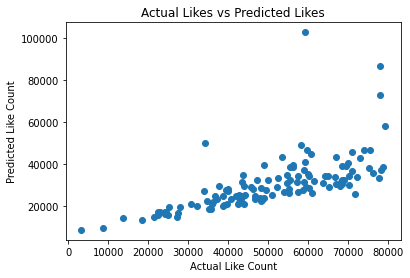

#### RUN 2: Linear Regression
This model was trained on standardised features, with only one user's data (Lewis Hamilton) available. Surprisingly the modes R^2, MSE, and the scatter plot did not change. It might be the case that the data do not have outliers as they got removed in the data processing section.

Number of training instances: 768
The model was trained on 3 input features.

Features= ['Reetweet Count', 'Reply Count', 'Quote Count']
Label= ['Like Count']


R^2: 0.58, MSE: 122148249.84


Scaled dataset -> StandardScaler()




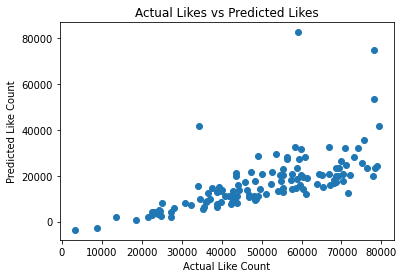

### Features Catagory 2
The Following models have been trained on the following features ['Word Count', 'Character Count', 'ASCII Tweet', 'Hashtag Count', 'Sentiment Subjectivity', 'Sentiment Polarity', 'Mention Count', 'Emoji Count'].

As discussed in section 4.2.2.11, most features do not correlate with like count. The cause is that features like sentiment polarity and others are non-linear, making their correlation low with the like count. It does not mean that the selected features are flawed. A model that learns non-linear data could be used, and the result could be good.

#### RUN 3: Linear Regressor

This model was trained on standardised features, with only one user's data (Lewis Hamilton) available. The R^2 error was 0.24, which is relatively low, and the MSE was 204471472.95. The scatter plot did not show strong linearity between the actual and the predicted values.

It was expected that the linear regression model's performance would be suboptimal given that it assumes a linear correlation between the features and the labels, which was not the case in this particular instance.

Number of training instances: 768
The model was trained on 8 input features.

Features= ['Word Count','Character Count', 'ASCII Tweet', 'Hashtag Count', 'Sentiment Subjectivity', 'Sentiment Polarity', 'Mention Count', 'Emoji Count']
Label= ['Like Count']


R^2: 0.24, MSE: 204471472.95


Scaled dataset -> StandardScaler()




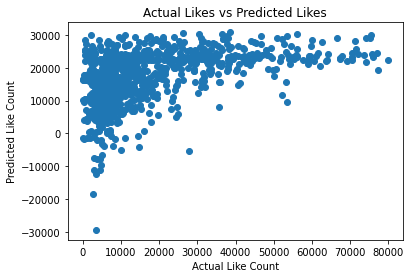

#### RUN 4: K-Neighbor Regressor

This model was trained on standardised features, with only one user's data (Lewis Hamilton) available. The R^2 error was 0.16, which is relatively low, and the MSE was 225574325.94. The scatter plot did show a linearity between the actual and the predicted values.

The K-Neighbor Regressor model is well-suited for leaner and non-linear data, which explains its impressive performance. By utilising n neighbours from a given point, this model does not rely on linearity as a critical factor in its operation. 

Number of training instances: 768 
 The model was trained on 8 input features.


Features= ['Word Count','Character Count', 'ASCII Tweet', 'Hashtag Count', 'Sentiment Subjectivity', 'Sentiment Polarity', 'Mention Count', 'Emoji Count']
Label= ['Like Count']


R^2: 0.16, MSE: 225574325.94


Scaled dataset -> StandardScaler()




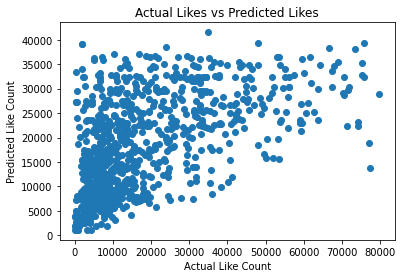

#### RUN 5: MLP Regressor

This model was trained on standardised features, with only one user's data (Lewis Hamilton) available. The R^2 error was -0.95, which is relatively low, and the MSE was 525369612.33. The scatter plot did not show a linearity between the actual and the predicted values.

Despite having high expectations due to its ability to work well with leaner and non-linear data as a multi-layer model, the MLP Regressor did not perform as expected. Unfortunately, due to time constraints, I could not conduct further investigation to determine the root cause of its low performance.

Number of training instances: 768 
 The model was trained on 8 input features.


Features= ['Word Count','Character Count', 'ASCII Tweet', 'Hashtag Count', 'Sentiment Subjectivity', 'Sentiment Polarity', 'Mention Count', 'Emoji Count']
Label= ['Like Count']


R^2: -0.95, MSE: 525369612.33


Scaled dataset -> StandardScaler()




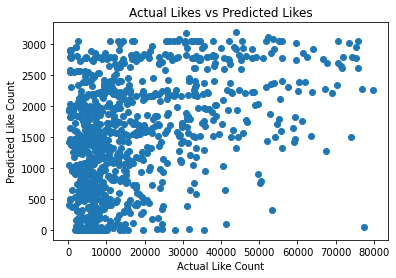

#### RUN 6: K-Neighbor Regressor

This model was trained on standardised features, with only seven users' data (users list in 4.2.1.1 ) available. The R^2 error was 0.10, which is relatively low, and the MSE was 261462649.44. The scatter plot did show some linearity between the actual and the predicted values.


The mode was retrained on all the available data because it outperformed the other two models. However, it was surprising that the model's performance decreased after training it on 6497 instances from the original 768 in RUN4. It was unexpected since the model had access to more data. Based on benchmarking results, the neighbour size was increased to 26 to improve its performance, and still, the final result of that run was not great.

Number of training instances: 6497 
 The model was trained on 8 input features.


Features= ['Word Count','Character Count', 'ASCII Tweet', 'Hashtag Count', 'Sentiment Subjectivity', 'Sentiment Polarity', 'Mention Count', 'Emoji Count']
Label= ['Like Count']


R^2: 0.10, MSE: 261462649.44


Scaled dataset -> StandardScaler()




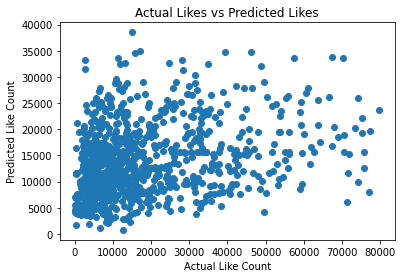

### Features Catagory 3
The Following models have been trained on the following features ['Word Count', 'Sentiment Subjectivity', 'Mention Count', 'Emoji Count', 'Reetweet Count', 'Reply Count', 'Quote Count'].

During RUN 1, we discussed including the 'Retweet Count', 'Reply Count', and 'Quote Count' features in our analysis. Initially, there was hesitation to include these features, but the decision was reassessed after training several models that underperformed. As a result, a decision was made to include all three features in order to improve the model's performance.

#### RUN 7: Linear Regressor

This model was trained on standardised features, with only seven users' data (users list in 4.2.1.1 ) available. The R^2 error was 0.70, which is good, and the MSE was 86596378.40. The scatter plot did show linearity between the actual and the predicted values.

Although the features used performed relatively well with the linear regression model, the overall result was not outstanding. It can be primarily attributed to the fact that the 'Word Count', 'Sentiment Subjectivity', 'Mention Count', and 'Emoji Count' exhibit some non-linear correlation with the like count. As a result, the linear regression model may not have been the best fit for capturing the full complexity of the relationship between these variables. Nonetheless, it is worth noting that the model still outperformed all previous runs.

Number of training instances: 6497 
 The model was trained on 8 input features.


Features= ['Word Count', 'Sentiment Subjectivity', 'Mention Count', 'Emoji Count', 'Reetweet Count', 'Reply Count', 'Quote Count']
Label= ['Like Count']


R^2: 0.70, MSE: 86596378.40


Scaled dataset -> StandardScaler()




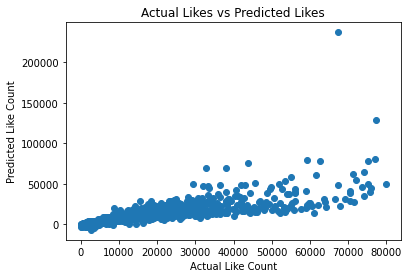

#### RUN 8: K-Neighbor Regressor

This model was trained on standardised features, with only seven users' data (users list in 4.2.1.1 ) available. The R^2 error was 0.73, which is good, and the MSE was 73608914.61. The scatter plot did show good linearity between the actual and the predicted values.

During our discussion in RUN 7, we noted that particular features exhibit nonlinearity, which makes it difficult for the Linear Regression model to perform well. As evidenced by the linearity of the plot for the K-Neighbor Regressor, the Linear Regression model did not perform well due to the nonlinearity of these features. 

Number of training instances: 6497 
 The model was trained on 8 input features.


Features= ['Word Count', 'Sentiment Subjectivity', 'Mention Count', 'Emoji Count', 'Reetweet Count', 'Reply Count', 'Quote Count']
Label= ['Like Count']


R^2: 0.73, MSE: 73608914.61


Scaled dataset -> StandardScaler()




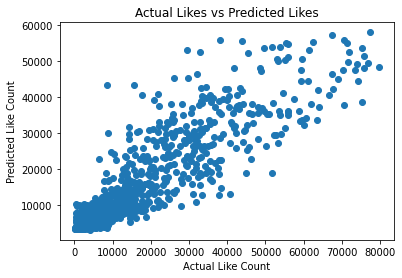

## 4.5.4 Conclusion of model evaluation and testing 
The task I undertook was both challenging and informative. It compelled me to step outside my comfort zone to perform numerous tests. Through this process, I gained a deeper understanding of machine learning, as well as the significance of feature correlations and how they can impact the results.

In conclusion, the RUN 8 model proved to be the most effective of all tested models. It was able to achieve superior performance by utilising features that were highly correlated with the like count, as well as incorporating additional features to enhance its performance further.